# Homework 3: Bike Sharing
## Exploratory Data Analysis (EDA) and Visualization
## Due Date: Friday October 18, 11:59 PM
## Course Policies

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your solution.

## Introduction

This assignment includes both specific tasks to perform and open-ended questions to investigate. The open-ended questions ask you to think critically about how the plots you have created provide insight into the data.

After completing this assignment, you should be comfortable with:

* reading plaintext delimited data into `pandas`
* wrangling data for analysis
* using EDA to learn about your data 
* making informative plots

## Grading
For free response, readers will evaluate how well you answered the question and/or fulfilled the requirements of the question.

For plots, your plots should be *similar* to the given examples. We will tolerate small variations such as color differences or slight variations in scale. However it is in your best interest to make the plots as similar as possible as similarity is subject to the readers.

Note that for ALL plotting questions from here on out, we will expect appropriate titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?


## Submission 
For this assignment and future assignments (homework and projects) you will need to upload a single document to  Gradescope. To do this, you can 
1. download as HTML (`File->Export Notebook As->HTML (.html)`)
2. Print HTML to PDF (.pdf)
3. Upload to Gradescope -- tagging your responses. 

You are responsible for submitting and tagging your answers in gradescope. For each free response and plotting question, please include:

1. Relevant code used to generate the plot or inform your insights
2. The written free response or plot

We are doing this to make it easier on our graders and for you, in the case you need to submit a regrade request. Gradescope (as of now) is still better for manual grading.


### Score breakdown


Question | Points
--- | ---
Question 1a | 2
Question 1b | 1
Question 1c | 2
Question 2a | 2
Question 2b | 2
Question 2c | 2
Question 2d | 2
Question 3a | 4
Question 3b | 3
Question 4a | 2
Question 4b | 2
Question 5a | 1
Question 5b | 4
Total | 29

In [1]:
# Run this cell to set up your notebook.  Make sure ds-ua-112_utils.py is in this assignment's folder
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from IPython.display import Image
from pathlib import Path
import ds_ua_112_utils

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown


## Loading Bike Sharing Data
The data we are exploring is data on bike sharing in Washington D.C.

The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total rental bikes including casual and registered  

### Download the Data

In [ ]:
# Run this cell to download the data.  No further action is needed

data_url = 'https://cims.nyu.edu/~policast/bikeshare.zip'
file_name = 'data.zip'
data_dir = '.'

dest_path = ds_ua_112_utils.fetch_and_cache(data_url=data_url, data_dir=data_dir, file=file_name)
print('Saved at {}'.format(dest_path))

zipped_data = zipfile.ZipFile(dest_path, 'r')

data_dir = Path('data')
zipped_data.extractall(data_dir)


print("Extracted Files:")
for f in data_dir.glob("*"):
    print("\t",f)

### Examining the file contents

Can you identify the file format? (No answer required.)

In [ ]:
# Run this cell to look at the top of the file.  No further action is needed
for line in ds_ua_112_utils.head(data_dir/'bikeshare.txt'):
    print(line,end="")

### Size
Is the file big?  How many records do we expect to find? (No answers required.)

In [ ]:
# Run this cell to view some metadata.  No further action is needed
print("Size:", (data_dir/"bikeshare.txt").stat().st_size, "bytes")
print("Line Count:", ds_ua_112_utils.line_count(data_dir/"bikeshare.txt"), "lines")

### Loading the data

The following code loads the data into a Pandas DataFrame.

In [ ]:
# Run this cell to load the data.  No further action is needed
bike = pd.read_csv(data_dir/'bikeshare.txt')
bike.head()

Below, we show the shape of the file. You should see that the size of the dataframe matches the number of lines in the file, minus the header row.

In [ ]:
bike.shape

---
## 1: Data Preparation
A few of the variables that are numeric/integer actually encode categorical data. These include `holiday`, `weekday`, `workingday`, and `weathersit`. In the following problem, we will convert these four variables to strings specifying the categories. In particular, use 3-letter labels (`Sun`, `Mon`, `Tue`, `Wed`, `Thu`, `Fri`, and `Sat`) for `weekday`. You may simply use `yes`/`no` for `holiday` and `workingday`. 

In this exercise we will *mutate* the data frame, **overwriting the corresponding variables in the data frame.** However, our notebook will effectively document this in-place data transformation for future readers. Make sure to leave the underlying datafile `bikeshare.txt` unmodified.

### Question 1
#### Question 1a (Decoding `weekday`, `workingday`, and `weathersit`)


Decode the `holiday`, `weekday`, `workingday`, and `weathersit` fields:

1. `holiday`: Convert to `yes` and `no`.  Hint: There are fewer holidays...
1. `weekday`: It turns out that Monday is the day with the most holidays.  Mutate the `'weekday'` column to use the 3-letter label (`'Sun'`, `'Mon'`, `'Tue'`, `'Wed'`, `'Thu'`, `'Fri'`, and `'Sat'` ...) instead of its current numerical values. Assume `0` corresponds to `Sun`, `1` to `Mon` and so on.
1. `workingday`: Convert to `yes` and `no`.
1. `weathersit`: You should replace each value with one of `Clear`, `Mist`, `Light`, or `Heavy`.

Note if you want to revert the changes run the cell that reloads the csv.

**Hint:**  One approach is to use the replace method of the pandas DataFrame class. We haven't discussed how to do this so you'll need to look at the documentation. The most concise way is with the approach described in the documentation as "nested-dictonaries", though there are many possible solutions.

In [ ]:
# Modify holiday weekday, workingday, and weathersit here
# Hint: one strategy involves df.replace(...)

### BEGIN SOLUTION
#TODO
### END SOLUTION

In [ ]:
assert isinstance(bike, pd.DataFrame)
assert bike['holiday'].dtype == np.dtype('O')
assert list(bike['holiday'].iloc[370:375]) == ['no', 'no', 'yes', 'yes', 'yes']
assert bike['weekday'].dtype == np.dtype('O')
assert bike['workingday'].dtype == np.dtype('O')
assert bike['weathersit'].dtype == np.dtype('O')

# Hidden tests
assert bike.shape == (17379, 17) or bike.shape == (17379, 18)
assert list(bike['weekday'].iloc[::2000]) == ['Sat', 'Tue', 'Mon', 'Mon', 'Mon', 'Sun', 'Sun', 'Sat', 'Sun']
assert list(bike['workingday'].iloc[::2000]) == ['no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no']
assert list(bike['weathersit'].iloc[::2000]) == ['Clear', 'Clear', 'Clear', 'Clear', 'Clear', 'Clear', 'Clear', 'Clear', 'Clear']

#### Question 1b (Holidays)

How many entries in the data correspond to holidays?  Set the variable `num_holidays` to this value.

In [ ]:
num_holidays = ...

### BEGIN SOLUTION
#TODO
### END SOLUTION

In [ ]:
assert 400 <= num_holidays <= 550

### BEGIN HIDDEN TESTS
assert num_holidays == 500
### END HIDDEN TESTS

#### Question 1c (Computing Daily Total Counts)

The granularity of this data is at the hourly level.  However, for some of the analysis we will also want to compute daily statistics.  In particular, in the next few questions we will be analyzing the daily number of registered and unregistered users.

Construct a data frame with the following columns:
* `casual`: total number of casual riders for each day
* `registered`: total number of registered riders for each day
* `workingday`: whether that day is a working day or not (`yes` or `no`)

**Hint**: `groupby` and `agg`. For the `agg` method, please check the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) for examples on applying different aggregations per column. If you use the capability to do different aggregations by column, you can do this task with a single call to `groupby` and `agg`. For the `workingday` column we can take any of the values since we are grouping by the day, thus the value will be the same within each group. Take a look at the `'first'` or `'last'` aggregation functions.

In [ ]:
daily_counts = ...

### BEGIN SOLUTION
#TODO
### END SOLUTION

In [ ]:
assert np.round(daily_counts['casual'].mean()) == 848.0
assert np.round(daily_counts['casual'].var()) == 471450.0

### BEGIN HIDDEN TESTS
assert np.round(daily_counts['registered'].mean()) == 3656.0
assert np.round(daily_counts['registered'].var()) == 2434400.0
assert sorted(list(daily_counts['workingday'].value_counts())) == [231, 500]
### END HIDDEN TESTS

---
## 2: Exploring the Distribution of Riders

Let's begin by comparing the distribution of the daily counts of casual and registered riders.  

### Question 2
#### Question 2a

Use the [`sns.distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html) function to create a plot that overlays the distribution of the daily counts of `casual` and `registered` users. The temporal granularity of the records should be daily counts, which you should have after completing question 1c.

Include a legend, xlabel, ylabel, and title. You may want to look at the [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) if you're not sure how to add these. After creating the plot, look at it and make sure you understand what the plot is actually telling us, e.g on a given day, the most likely number of registered riders we expect is ~4000, but it could be anywher from almost none to 7000.

## IMAGE 

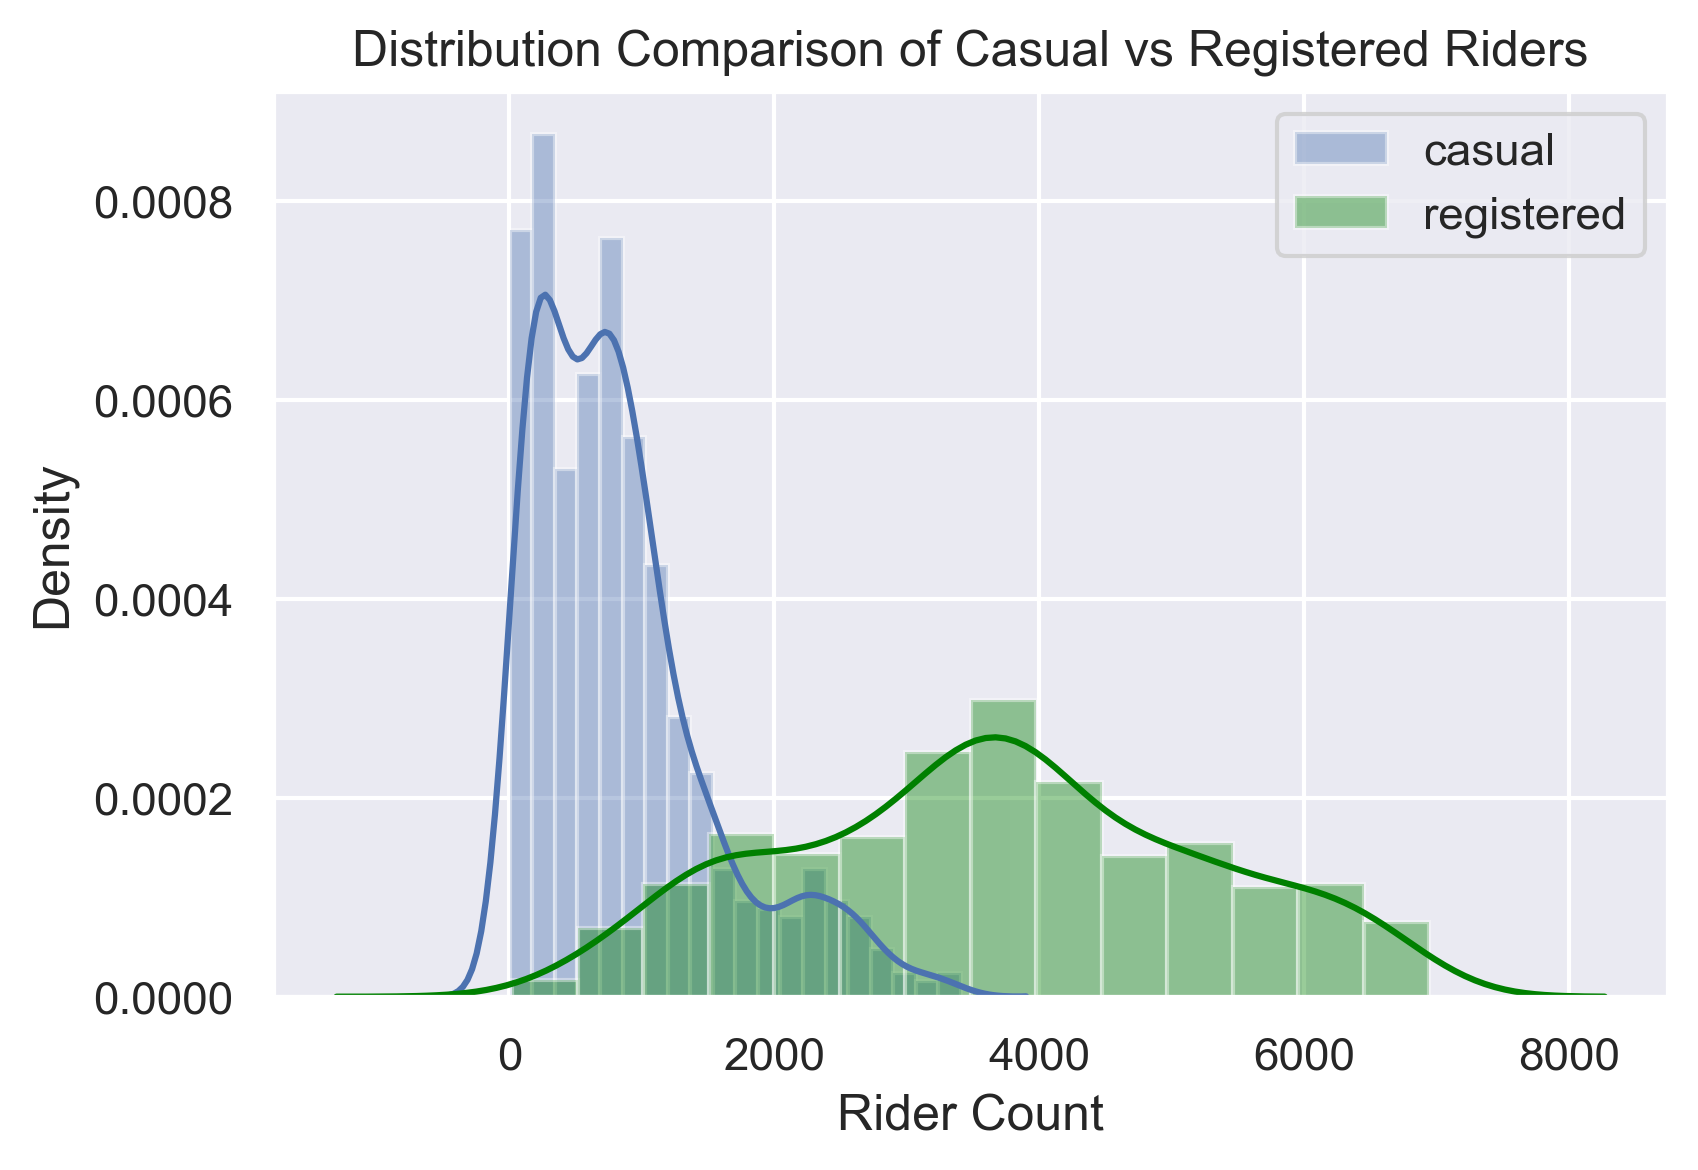

In [2]:
Image(filename='images/casual_v_registered.png', embed=True, height=10, width=700)

In [ ]:
...

### BEGIN SOLUTION
#TODO
### END SOLUTION

### Question 2b

In the cell below, descibe the differences you notice between the density curves for casual and registered riders.  Consider concepts such as modes, symmetry, skewness, tails, gaps and outliers.  Include a comment on the spread of the distributions. 

In [ ]:
q2b = ...

### BEGIN SOLUTION
#TODO
### END SOLUTION

### Question 2c

The density plots do not show us how the daily counts for registered and casual riders vary together. Use [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to make a scatter plot to investigate the relationship between casual and registered counts. The `lmplot` function will also try to draw a linear regression line (just as you saw in Data 8). Color the points in the scatterplot according to whether or not the day is working day. There are many points in the scatter plot so make them small to help with over plotting. Also make sure to set `fit_reg=True` to generate the linear regression line. You can set the `height` parameter if you want to adjust the size of the `lmplot`. Make sure to include a title.



**Hints:** 
* Checkout this helpful [tutorial on `lmplot`](https://seaborn.pydata.org/tutorial/regression.html).

* You will need to set `x`, `y`, and `hue` and the `scatter_kws`.

## IMAGE 

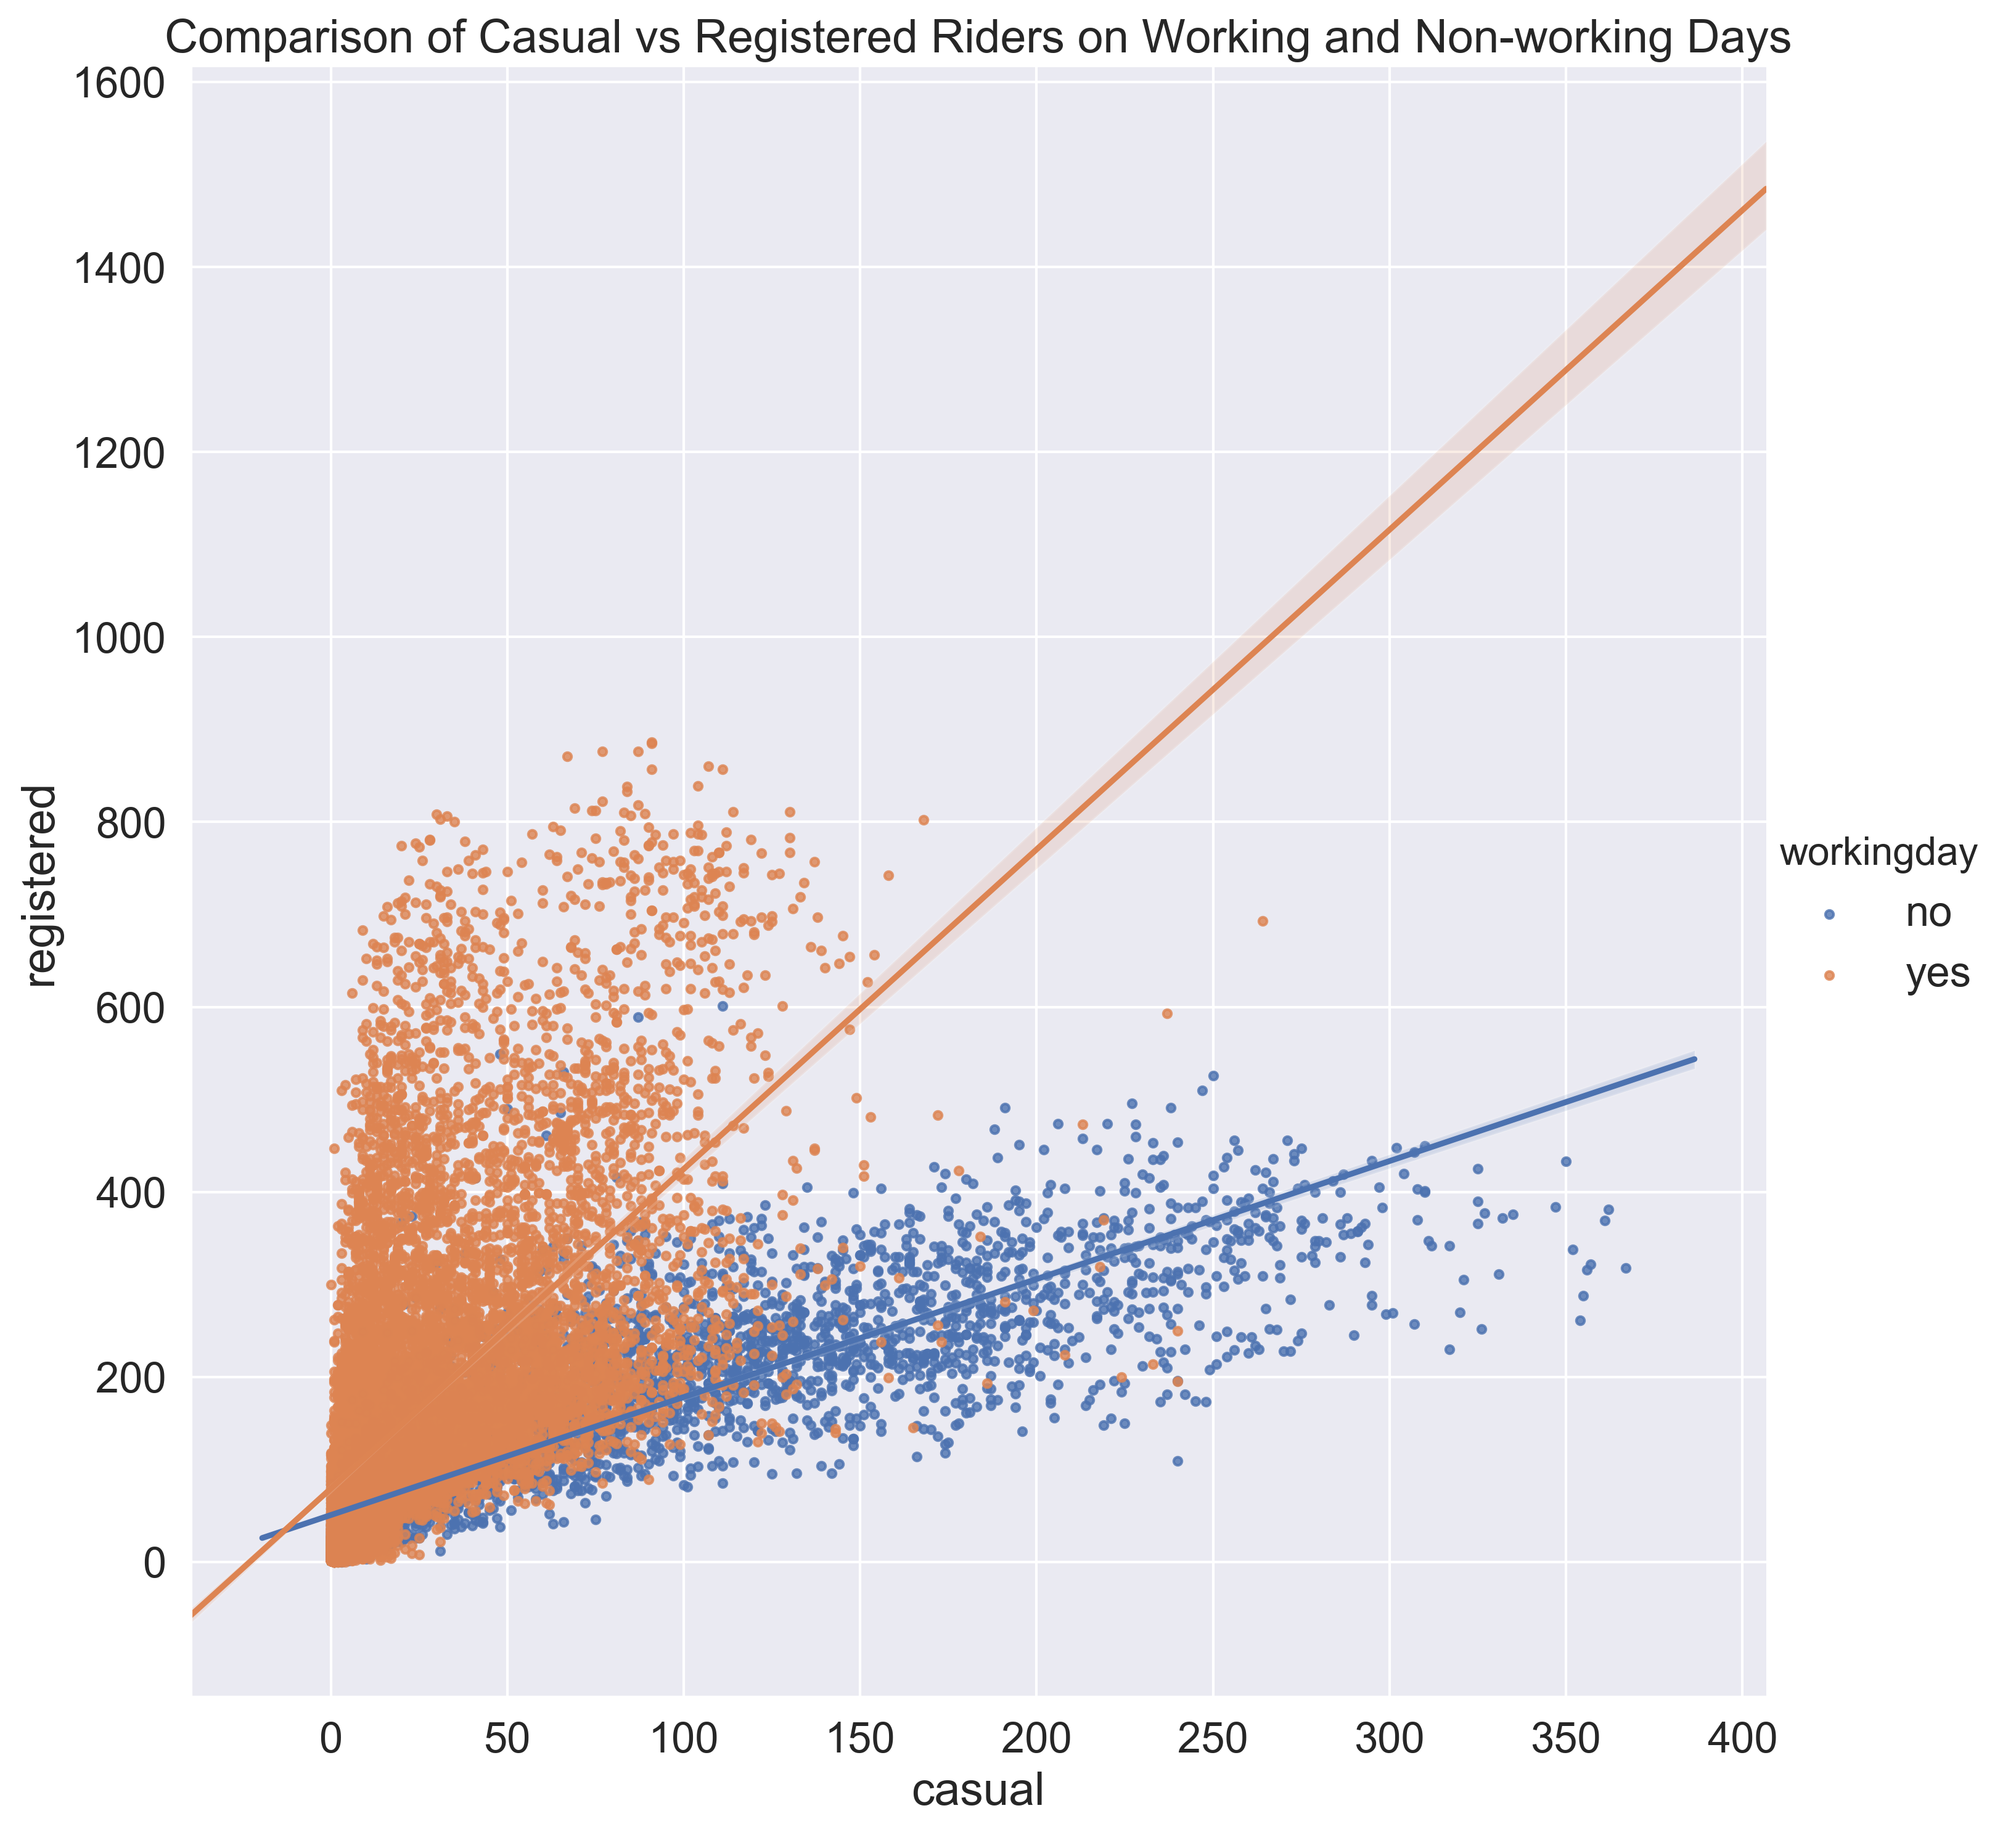

In [3]:
Image(filename='images/casual_registered_working_nonworking.png', embed=True, height=10, width=700)

In [ ]:
# Make the font size a bit bigger
sns.set(font_scale=1.5)
...

### BEGIN SOLUTION
#TODO
### END SOLUTION

### Question 2d

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered riders and whether or not the day is on the weekend?

Why might we be concerned with overplotting in examining this relationship? By "overplotting", we're referring to the term used in chapter 6.5 of the [textbook](http://www.textbook.ds100.org/ch/06/viz_principles_2.html).


In [ ]:
q2d = ...

### BEGIN SOLUTION
#TODO
### END SOLUTION

A basic kde plot of all the data is quite easy to generate. However, this plot includes both weekend and weekday data, which isn't what we want (see example figure above).

---
## 3: Exploring Ride Sharing and Time

### Question 3

#### Question 3a

Plot number of riders for each day in the month of June in 2011. 

Make sure to add descriptive x-axis and y-axis labels and create a legend to distinguish the line for casual riders and the line for registered riders. The end result should look like the figure below. The shaded region is a bootstrap confidence interval similar to what you learned about in Data 8. 

Make sure to include xlabel, ylabel, a legend, and a title.

**Hints:**
* Add a new Series to the `bike` datafame correpsonding to the day. You can do something similar to what you did in `hw1` when you created the `postal_code_5` Seres. 
* Make sure your day series is of type int. One way is to use the `map` method of the Series class, i.e. `s.map(int)`.
* Use `sns.lineplot`.

## IMAGE 

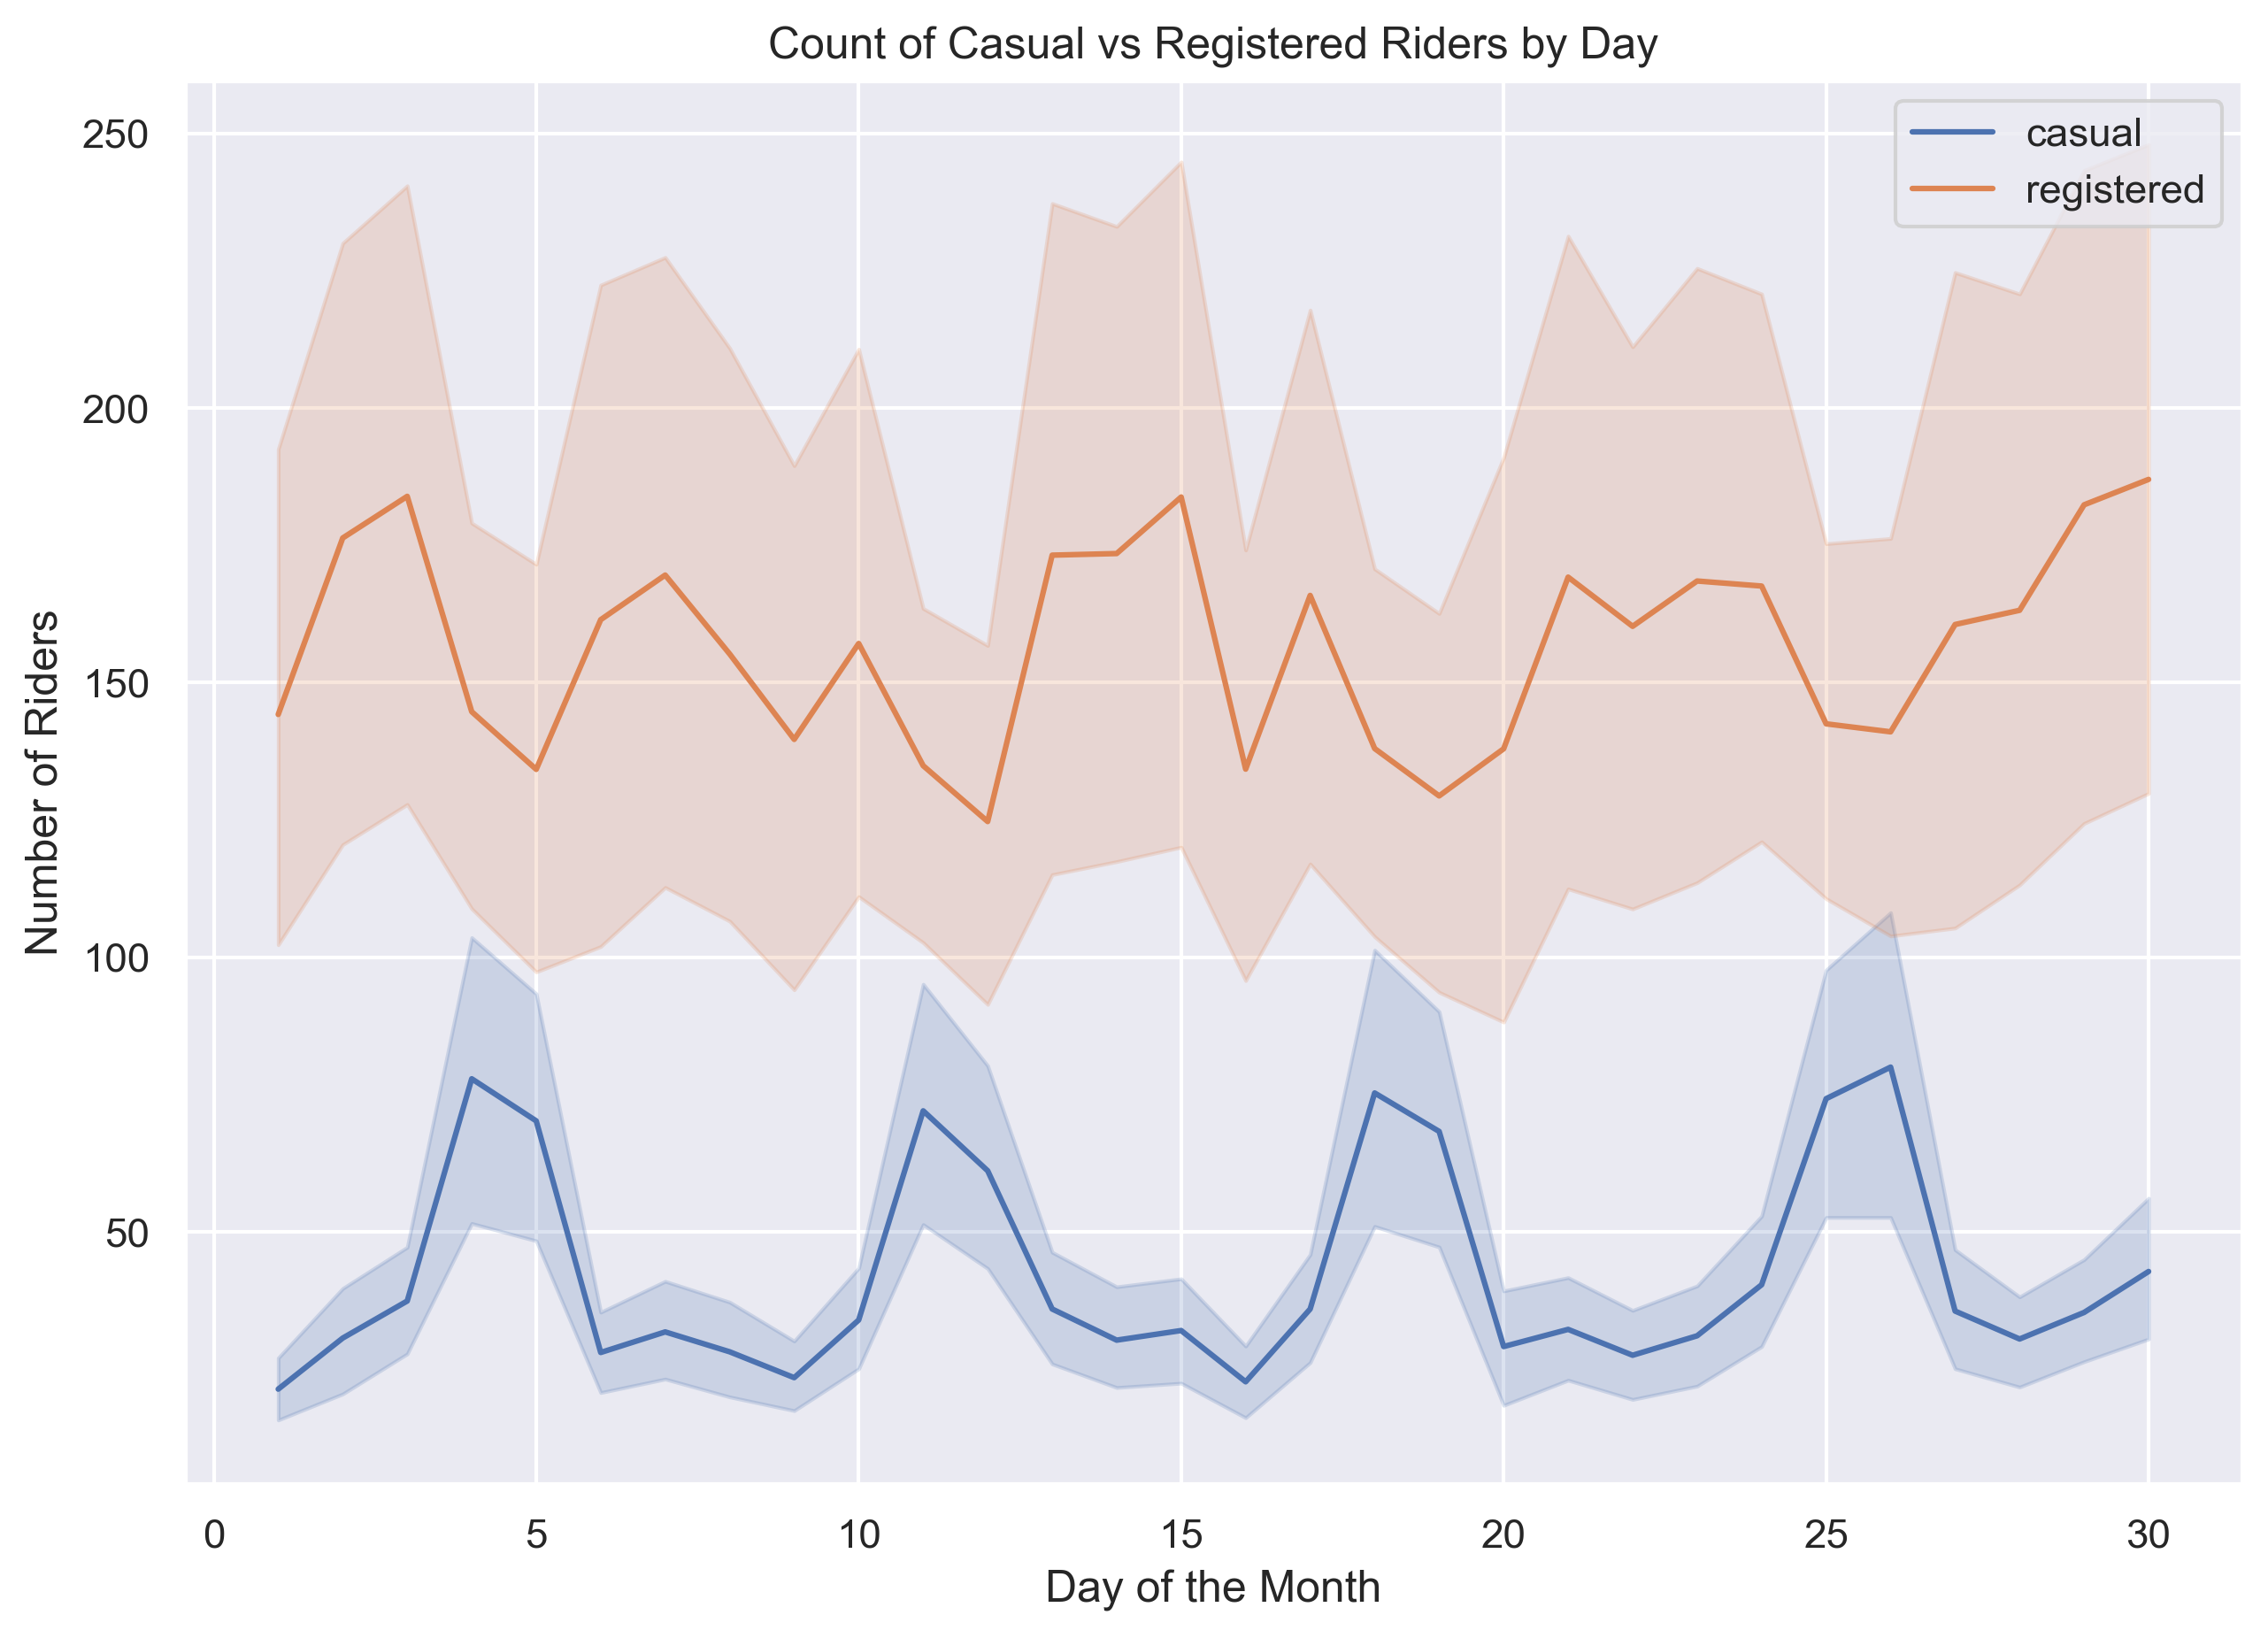

In [4]:
Image(filename='images/june_riders.png', embed=True, height=10, width=700)

In [ ]:
import seaborn as sns; sns.set();

In [ ]:
...

### BEGIN SOLUTION
#TODO
### END SOLUTION

#### Question 3b

This plot has several interesting features. How do the number of casual and registered riders compare for different days of the month? What is an interesting trend and pattern you notice between the lines? Why do you think the confidence interval for the registered riders is, on average, wider than the confidence interval for casual riders?

In [ ]:
q4b = ...

### BEGIN SOLUTION
#TODO
### END SOLUTION

---
## 4: Understanding Daily Patterns

### Question 4

#### Question 4a
Let's examine the behavior of riders by plotting the average number of riders for each hour of the day over the **entire dataset** (not just June 2011), stratified by rider type.  

Your plot should look like the following:

## IMAGE 

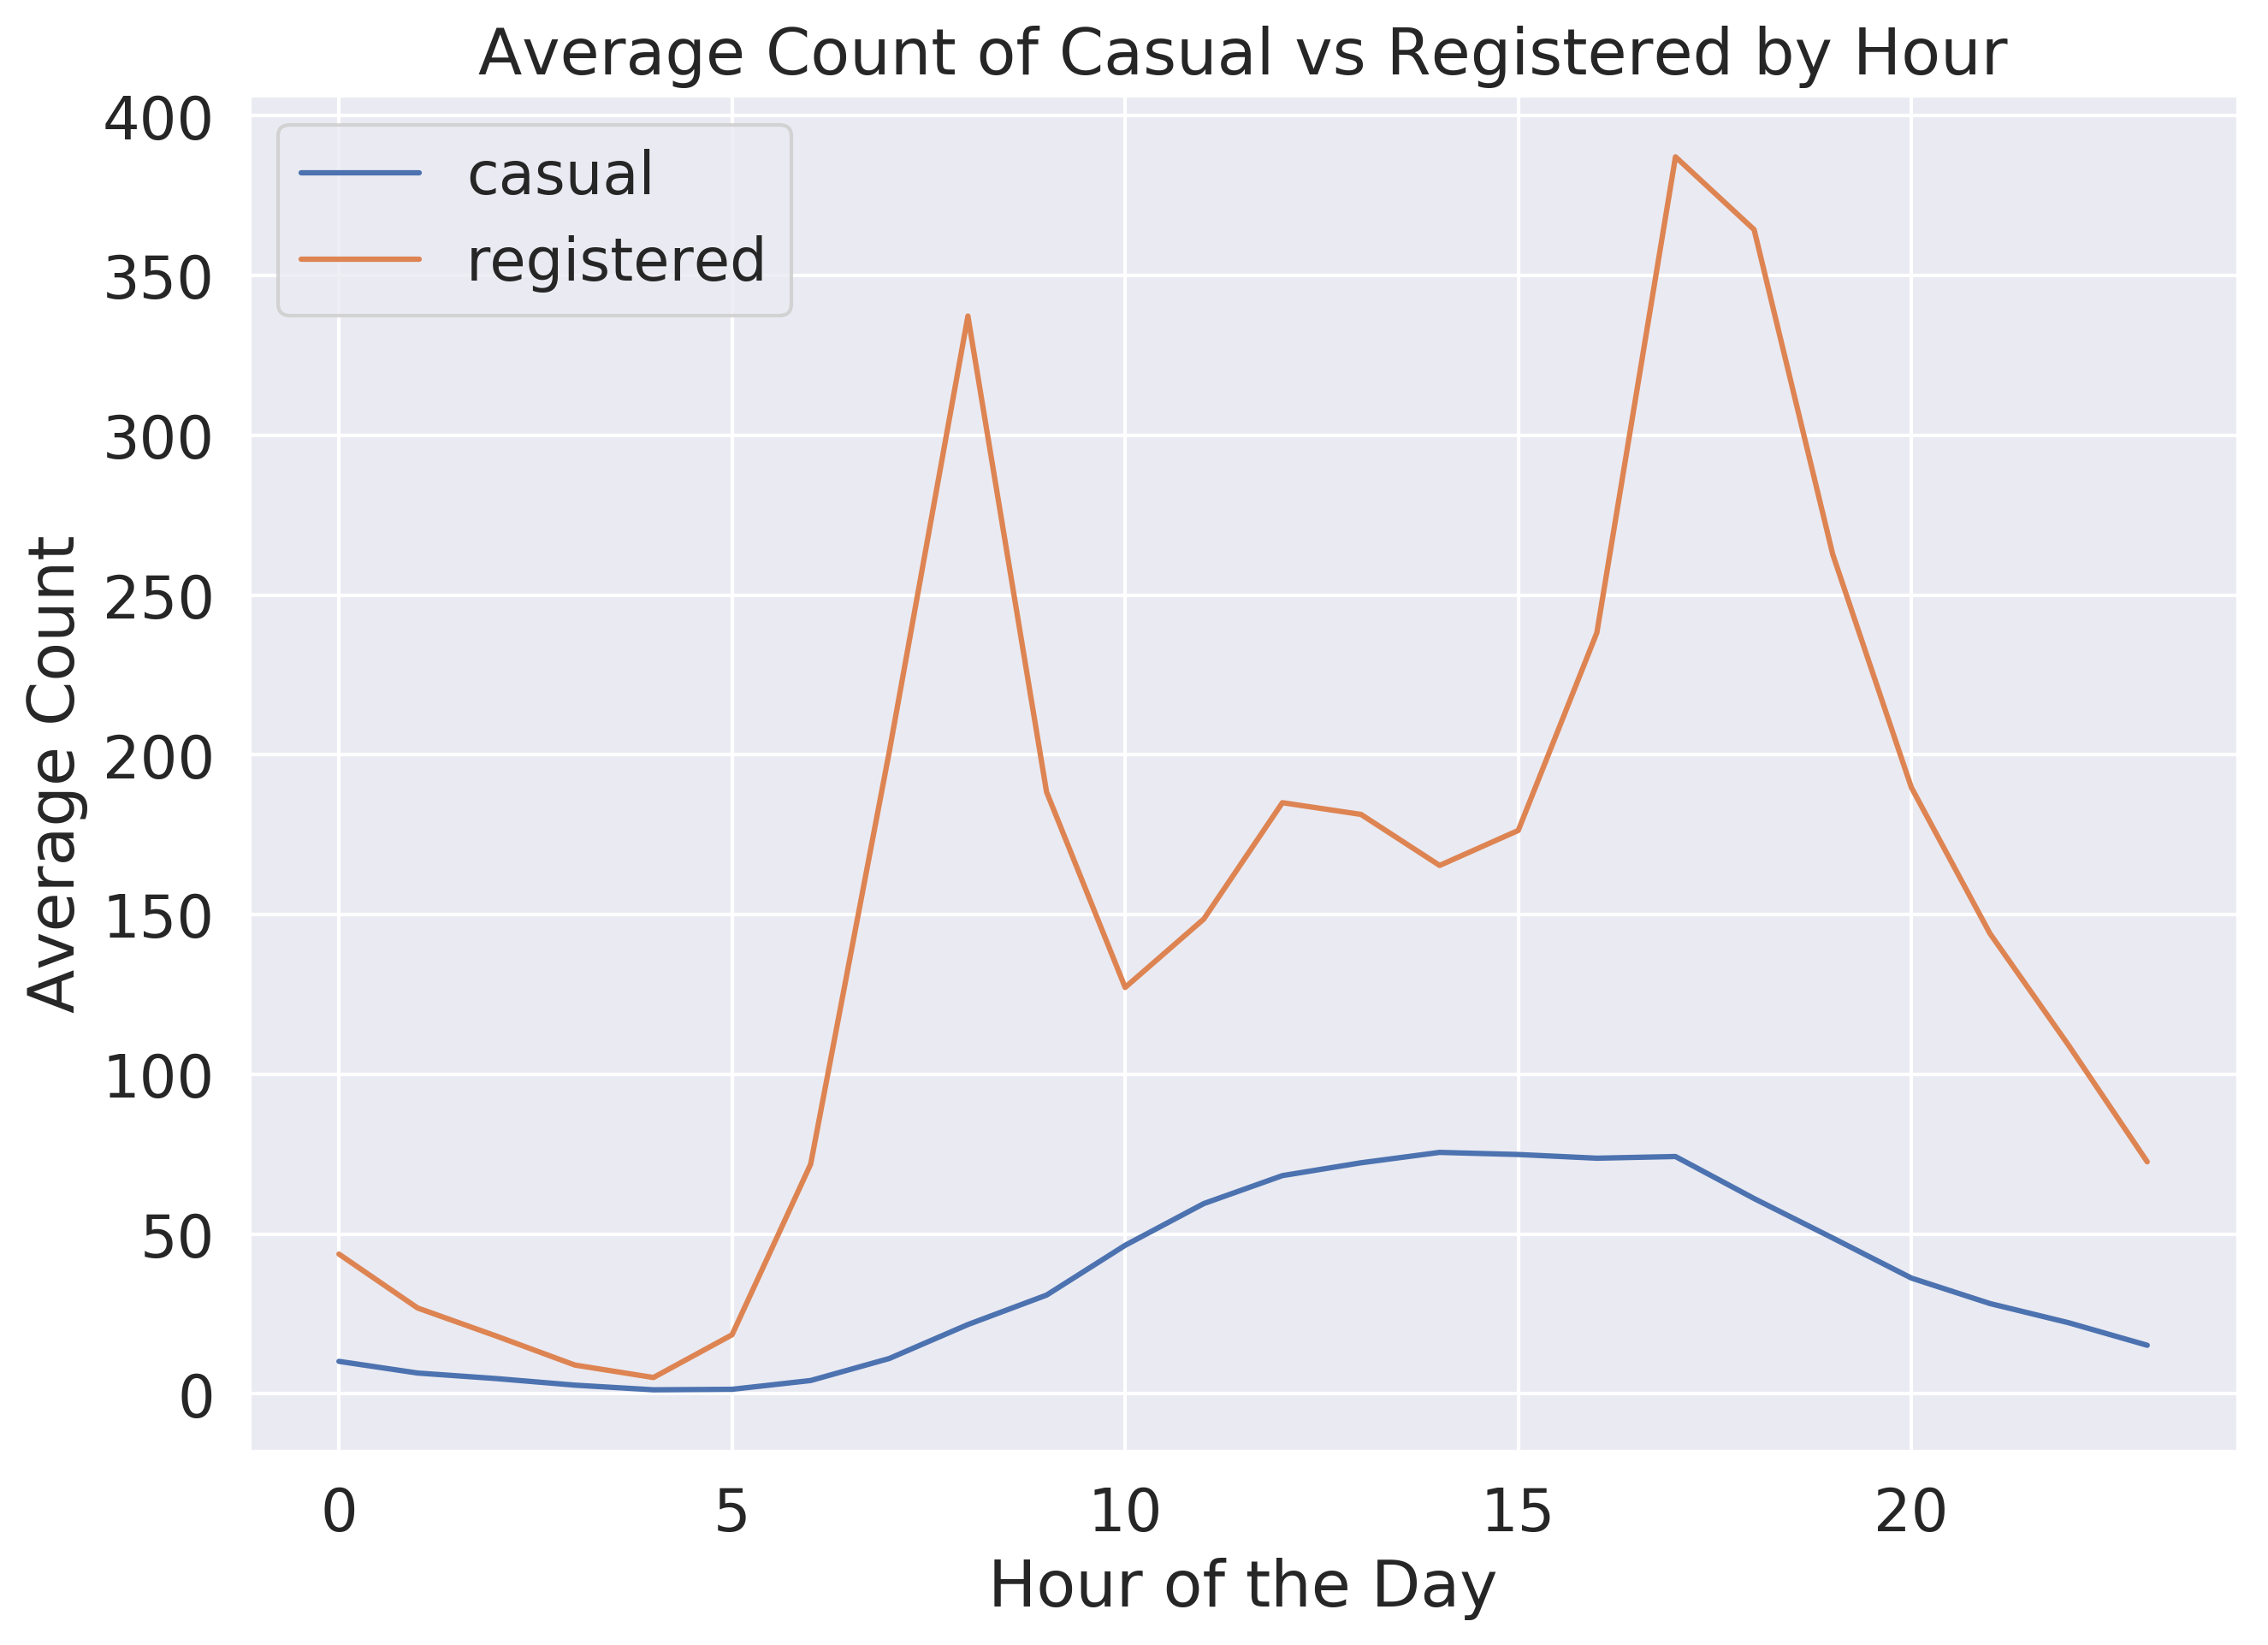

In [5]:
Image(filename='images/diurnal_bikes.png', embed=True, height=10, width=700)

In [ ]:
...

### BEGIN SOLUTION
#TODO
### END SOLUTION

#### Question 4b

What can you observe from the plot?  Hypothesize about the meaning of the peaks in the registered riders' distribution.

In [ ]:
q5b = ...

### BEGIN SOLUTION
#TODO
### END SOLUTION

---
## 5: Exploring Ride Sharing and Weather
Now let's examine how the weather is affecting rider's behavior. First let's look at how the proportion of casual riders changes as weather changes.

### Question 5

#### Question 5a
Create a new column `prop_casual` in the `bike` dataframe representing the proportion of casual riders out of all riders.

In [ ]:
...

### BEGIN SOLUTION
#TODO
### END SOLUTION

In [ ]:
assert int(bike["prop_casual"].sum()) == 2991

### BEGIN HIDDEN TESTS
assert np.round(bike["prop_casual"].mean(), 2) == 0.17
### END HIDDEN TESTS

#### Question 5b
In order to examine the relationship between proportion of casual riders and temperature, we can create a scatterplot using `sns.scatterplot`. We can even use color/hue to encode the information about day of week. Run the cell below, and you'll see we end up with a big mess that is impossible to interpret.

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=bike, x="temp", y="prop_casual", hue="weekday");

We could attempt linear regression using `sns.lmplot` as shown below, which hint at some relationships between temperature and proportional casual, but the plot is still fairly unconvincing. 

## IMAGE 

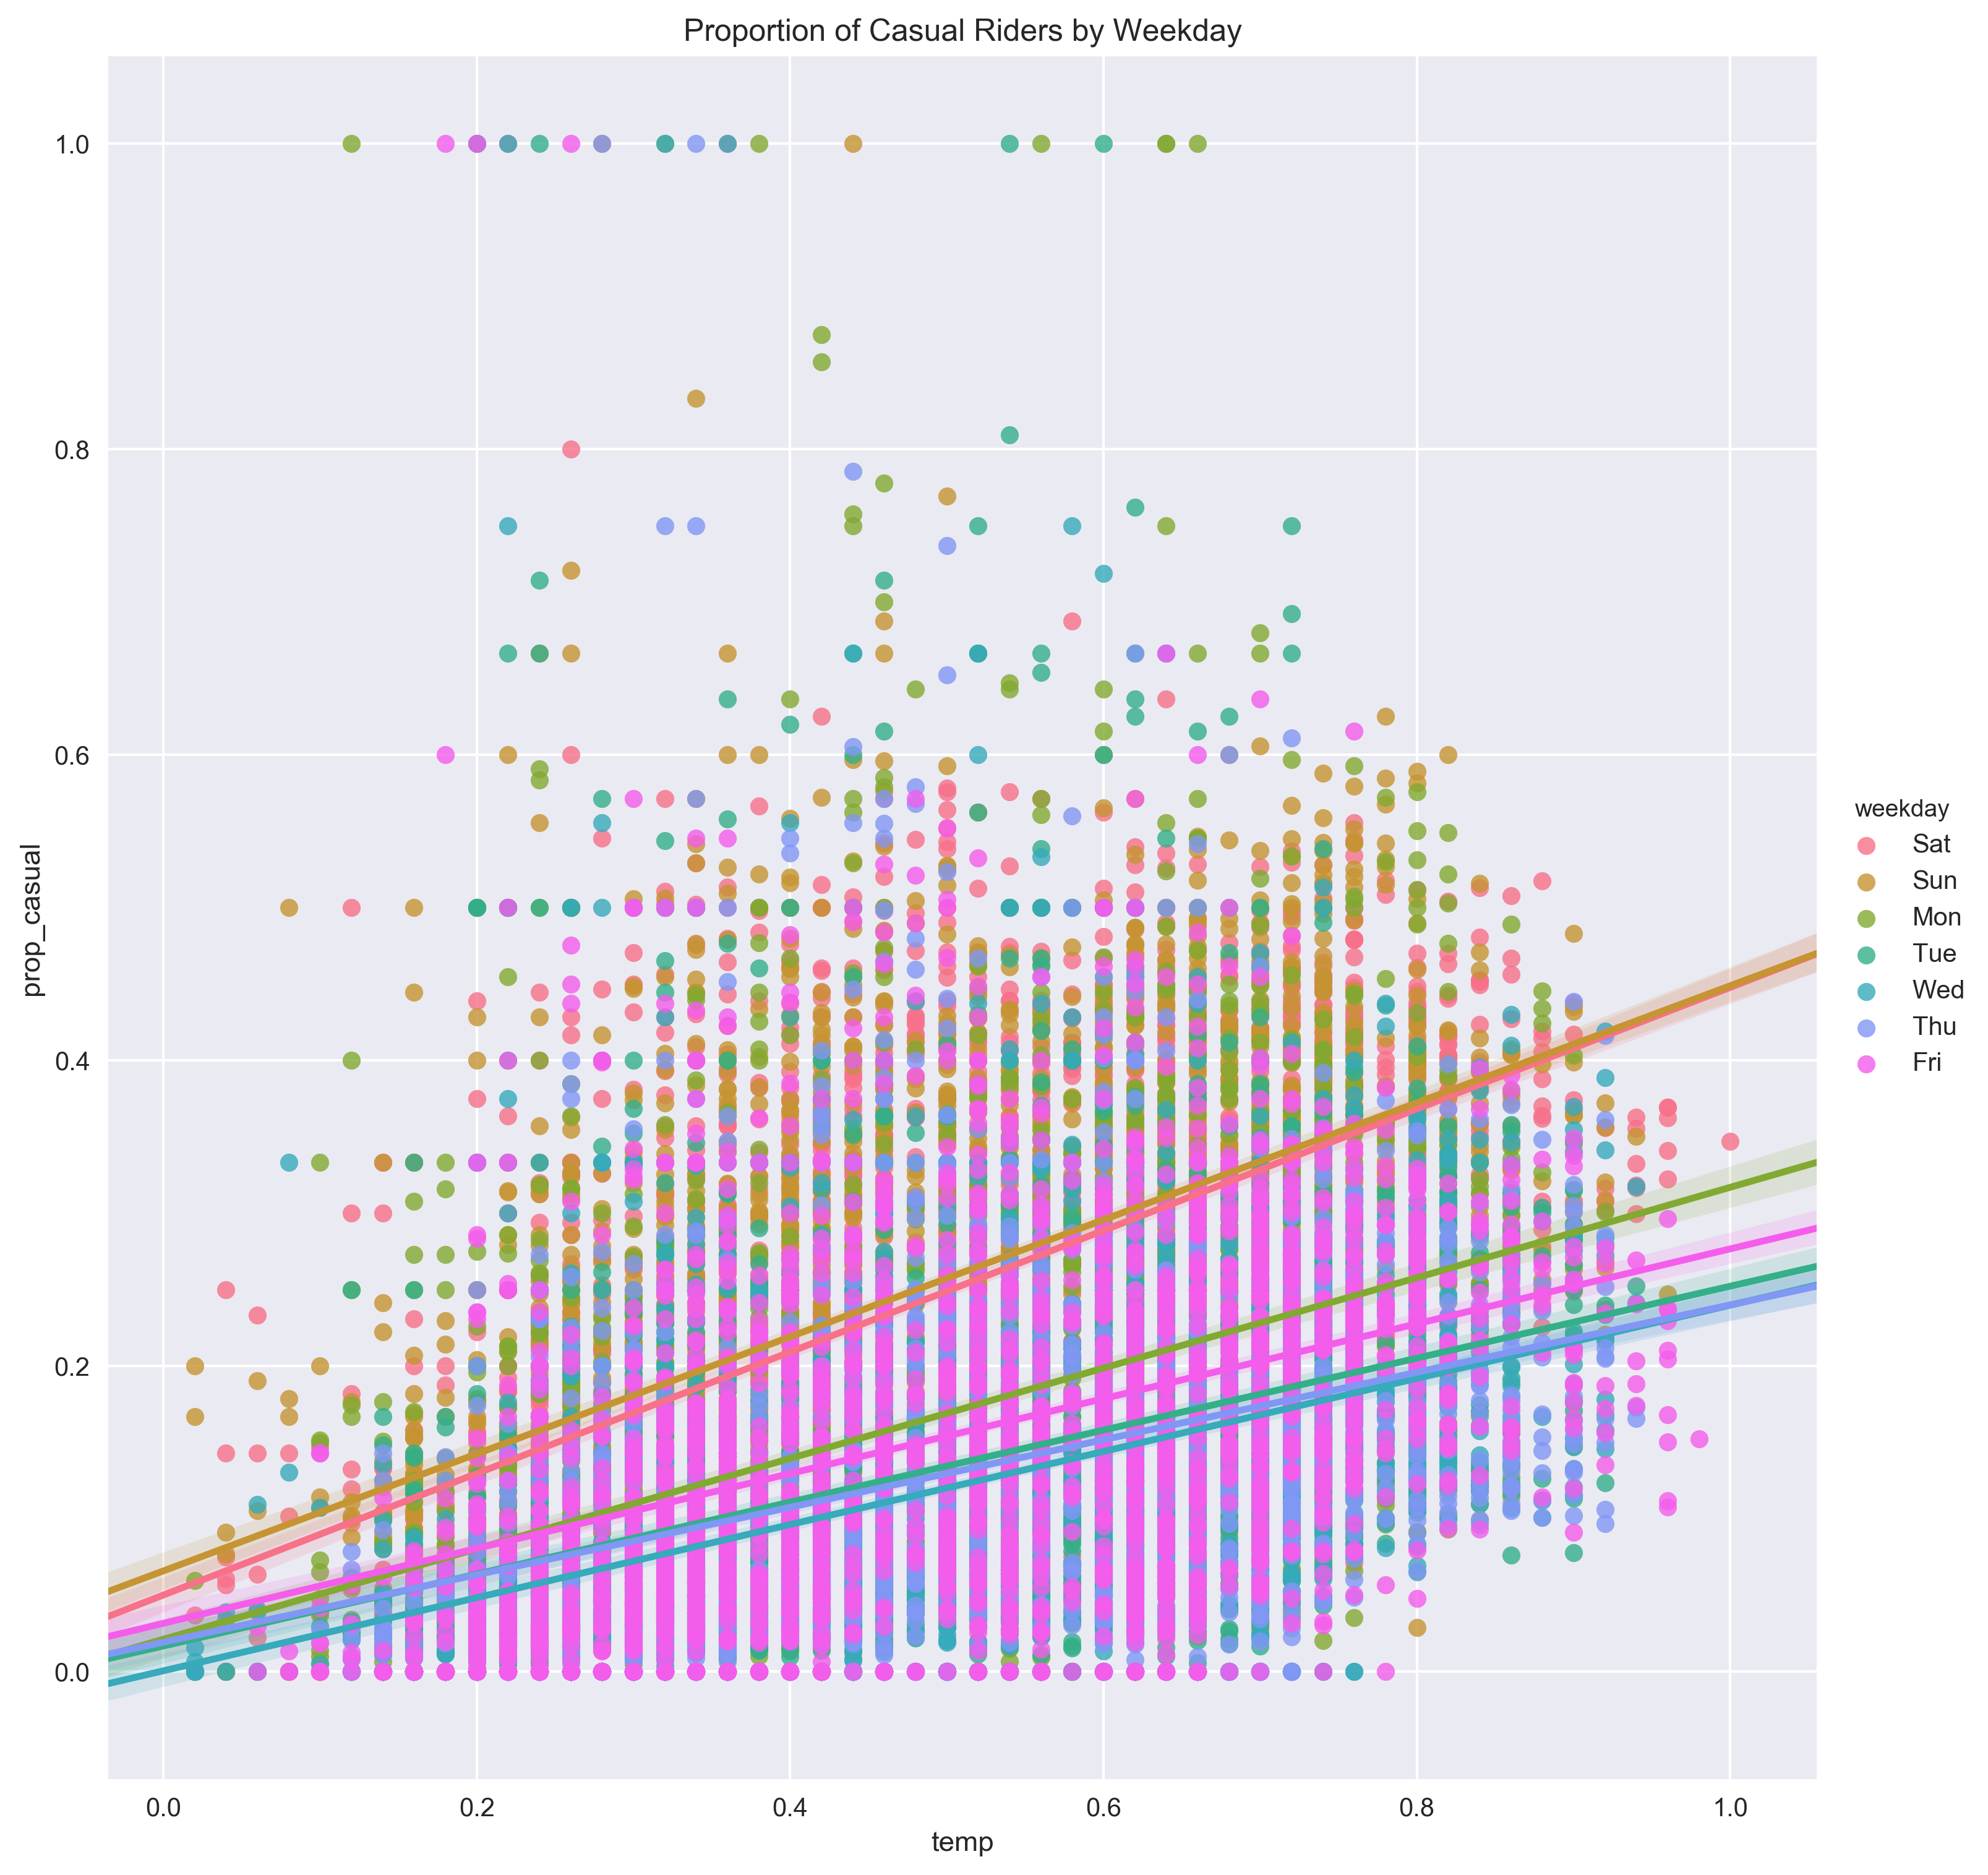

In [6]:
Image(filename='images/curveplot_temp_prop_casual_2.png', embed=True, height=10, width=700)

In our case with the bike ridership data, we want 7 curves, one for each day of the week. The x-axis will be the temperature and the y-axis will be some version of the proportion of casual riders. We want to remove the underlying scatter-plot.

## IMAGE 

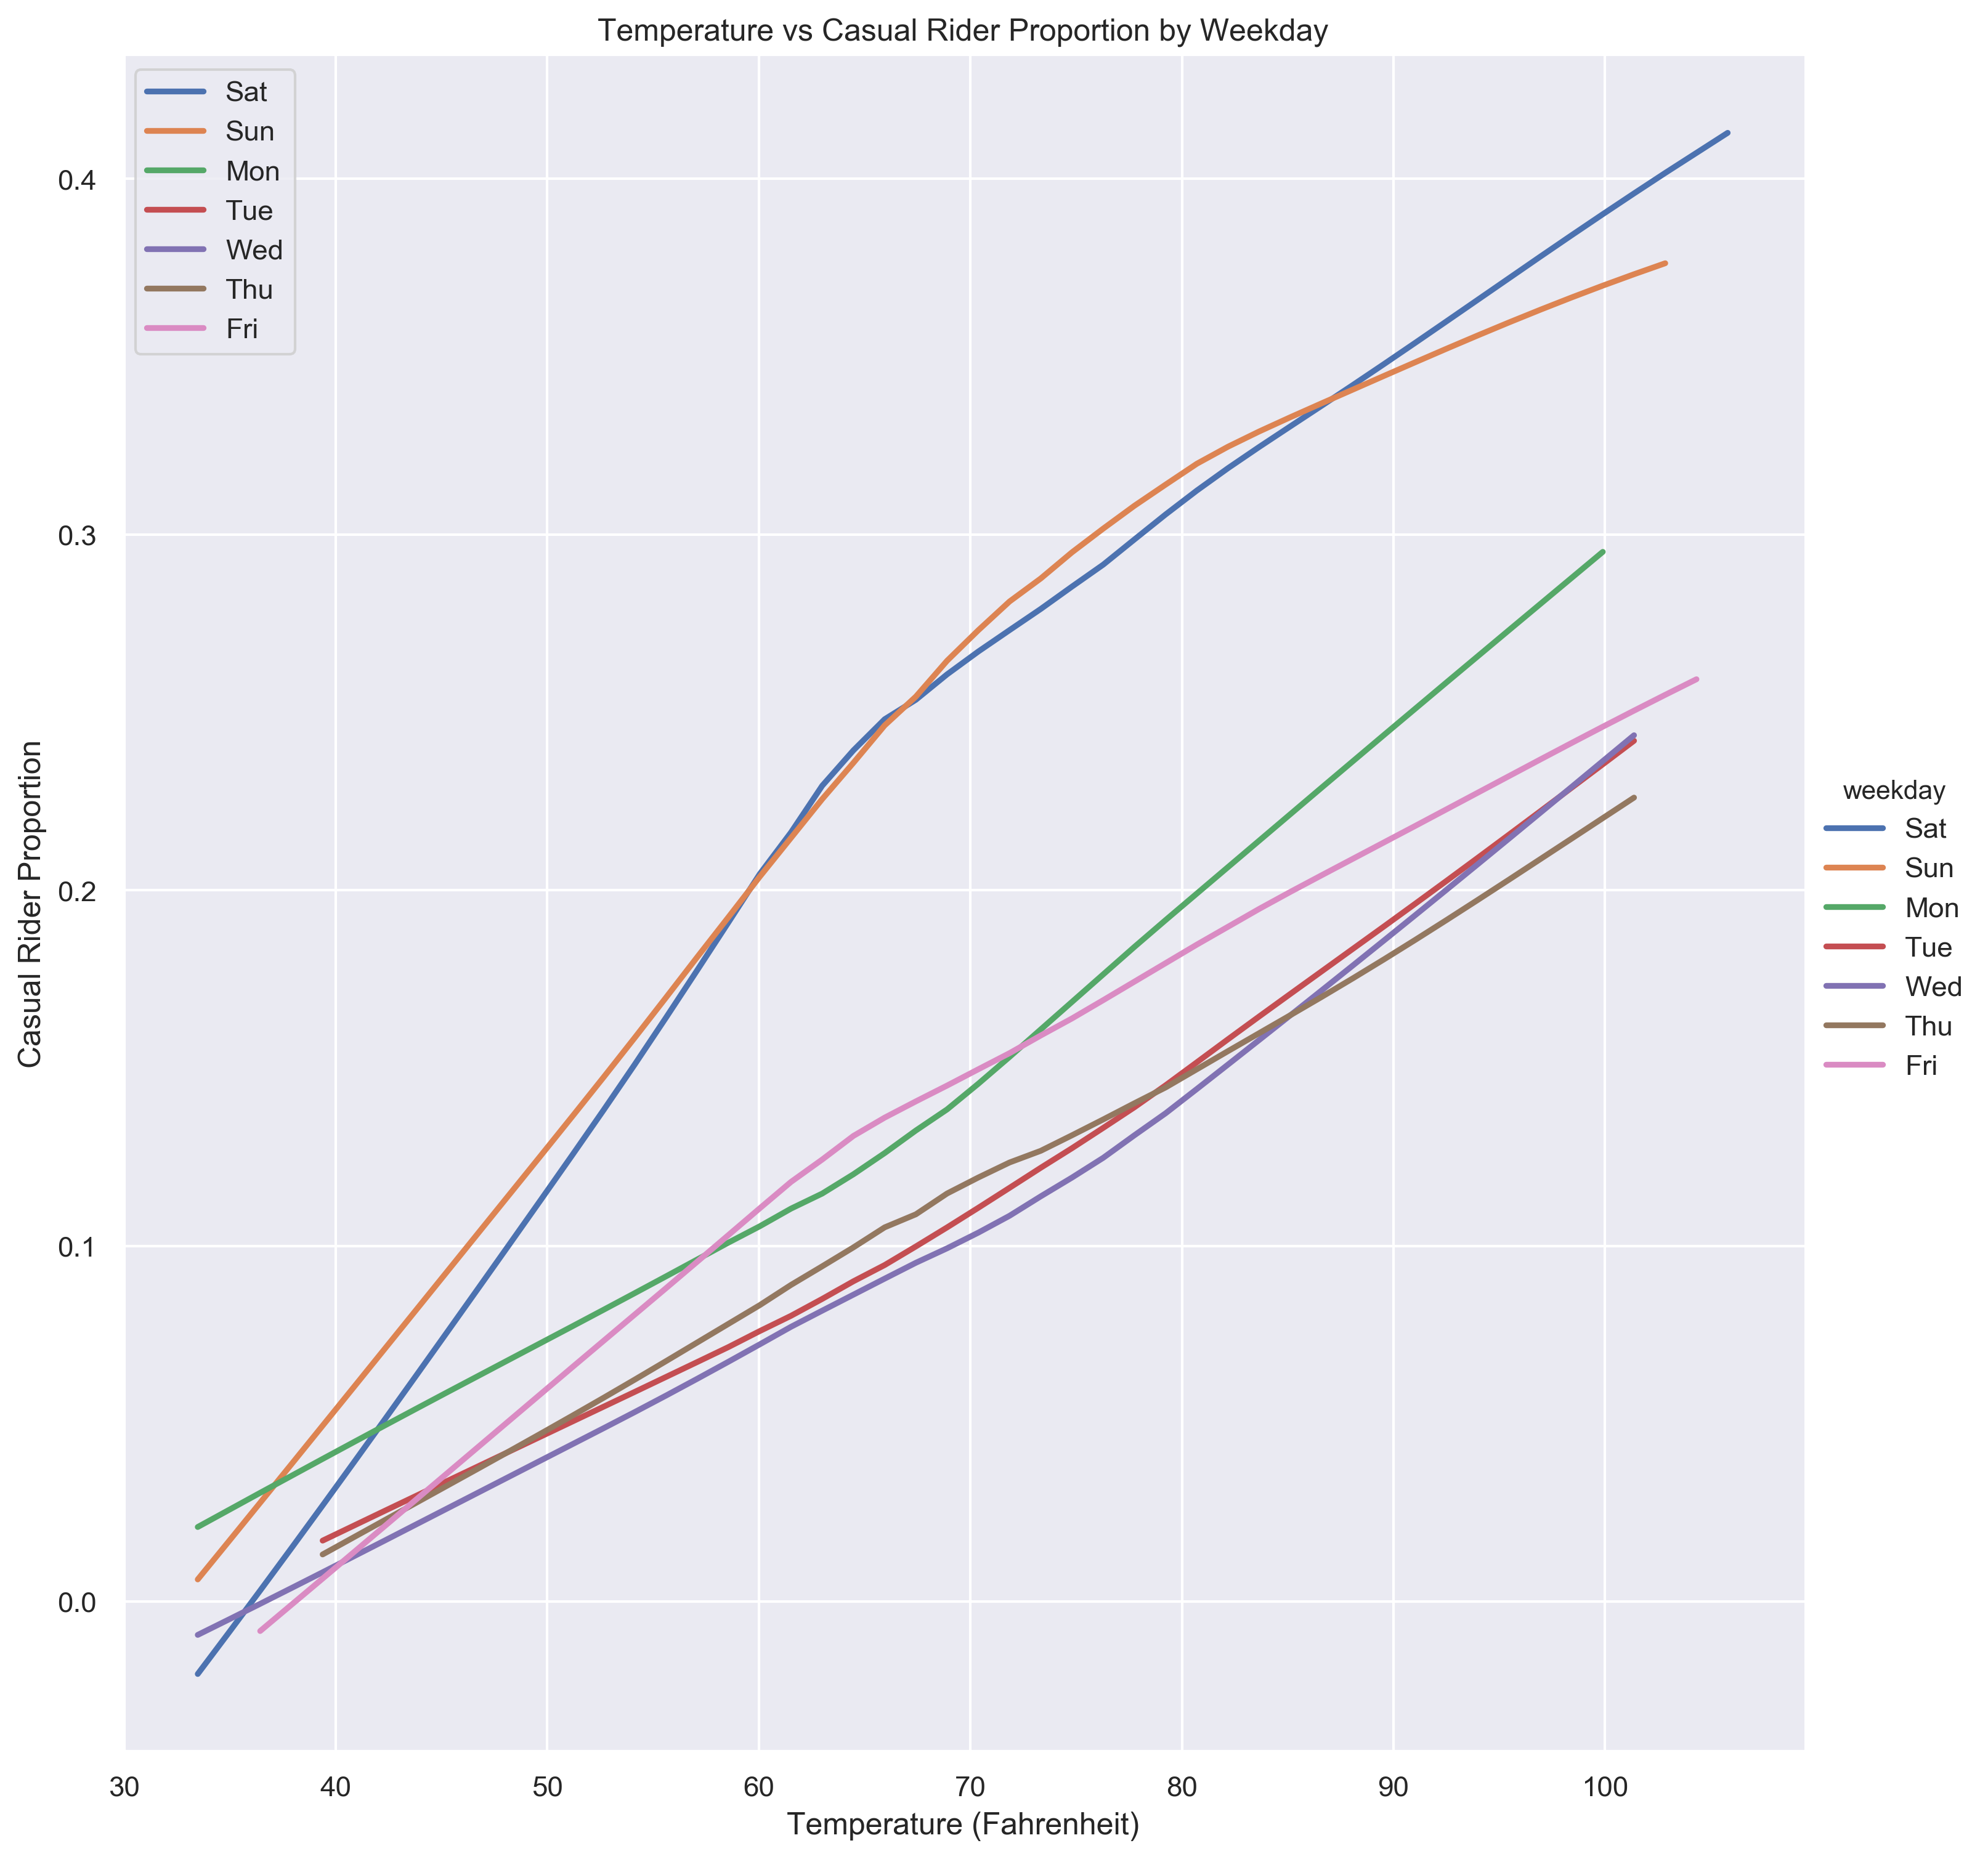

In [7]:
Image(filename="images/curveplot_temp_prop_casual.png", embed=True, height=10, width=700)

**Hints:** 
* Start by just plotting only one day of the week to make sure you can do that first.

* Try taking ```lowess = True``` in ```sns.lmplot``` for a better fit to the trends over the 7 curves. This will allow the curves to wiggle between points. 

* Look at the top of this homework notebook for a description of the temperature field to know how to convert to fahrenheit. By default, the temperature field ranges from 0.0 to 1.0.

Note: If you prefer putting your plot in Celsius, that's fine as well!

In [ ]:


plt.figure(figsize=(10,8))

### BEGIN SOLUTION
#TODO
### END SOLUTION

#### Question 5b
What do you see from the curve plot? How is `prop_casual` changing as a function of temperature? Do you notice anything else interesting?

In [ ]:
q5c = ...

### BEGIN SOLUTION
#TODO
### END SOLUTION